## Stochastic (Random) Gradient Descent

**Problem with Batch GD**: Slow for large datasets because it uses all training examples for each gradient calculation.

**SGD Solution**: Uses only one random training example per iteration to compute gradients.

This makes it:

- Much faster per iteration
- Able to handle huge datasets (only one example in memory at a time)
- Better at **escaping local minima** dura to randomness

**Trade-off**: The randomness causes the cost function to "bounce around" instead of smoothly decreasing. The solution is to use a **learning schedule** that gradually reduces the learning rate over time.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor

In [2]:
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Add bias term column
X_b = np.c_[np.ones((100, 1)), X]

In [3]:
theta_path_sgd = []
m = len(X_b)

In [4]:
n_epochs = 50  # number of passes through the entire dataset
t0, t1 = 5, 50  # learning schedule hyperparameters
# Hyperparameters that control how quickly the learning rate decays


# Returns a learning rate that decreases as t increases
def learning_schedule(t):
    return t0 / (t + t1)


theta = np.random.randn(2, 1)  # random initialization

# When t = 0: η = 5/(0 + 50) = 0.1
# When t = 1000: η = 5/(1000 + 50) ≈ 0.0048

In [5]:
# make predictions
X_new = np.array([[0], [2]])  # create new instances to predict: x=0 and x=2
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0=1: becomes [[1, 0], [1, 2]]

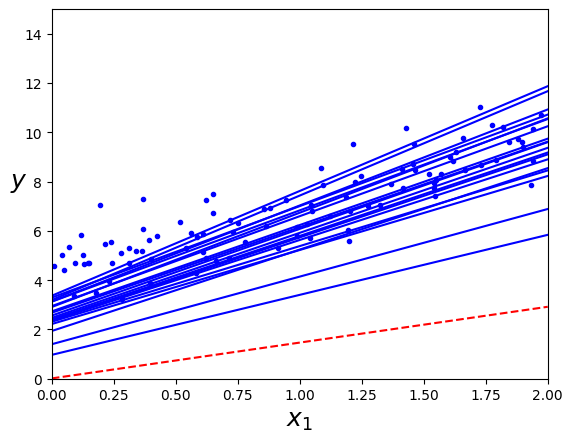

In [6]:
for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:
            y_predict = X_new_b.dot(theta)
            style = "b-" if i > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        random_index = np.random.randint(m)
        xi = X_b[random_index : random_index + 1]
        yi = y[random_index : random_index + 1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [7]:
theta

array([[4.19000137],
       [2.73381258]])

### Sklearn Implementation

- `max_iter=1000`: Maximum number of epochs (passes through data)
- `tol=1e-3`: Tolerance - stop if improvement is too small
- `penalty=None`: No regularization (we'll learn this later)
- `eta0=0.1`: Starting learning rate (Scikit-Learn has its own schedule)


In [8]:
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

,loss,'squared_error'
,penalty,None
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,random_state,42


In [9]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.24365286]), array([2.8250878]))

### Visualizing the difference

**Batch GD**: Smooth, direct path to minimum
**SGD**: Noisy, bouncing path that eventually reaches near the minimum


In [10]:
# To visualize SGD's bouncing behavior:
theta_path_sgd = []
n_epochs = 50
t0, t1 = 5, 50

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index : random_index + 1]
        yi = y[random_index : random_index + 1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta.copy())  # Store for visualization

### Visualize the Bouncing Behavious


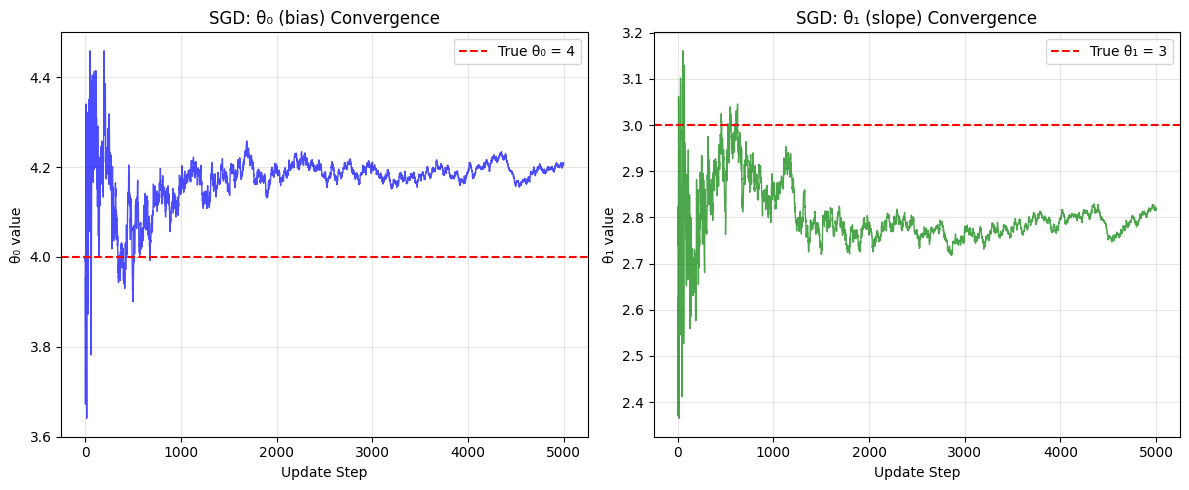

In [ ]:
# Convert to numpy array for easier plotting
theta_path_sgd_array = np.array(theta_path_sgd).squeeze()

plt.figure(figsize=(12, 5))

# Plot θ₀ convergence
plt.subplot(121)
plt.plot(theta_path_sgd_array[:, 0], "b-", alpha=0.7, linewidth=1)
plt.axhline(y=4, color="r", linestyle="--", label="True θ₀ = 4")
plt.xlabel("Update Step")
plt.ylabel("θ₀ value")
plt.title("SGD: θ₀ (bias) Convergence")
plt.legend()
plt.grid(True, alpha=0.3)

# Plot θ₁ convergence
plt.subplot(122)
plt.plot(theta_path_sgd_array[:, 1], "g-", alpha=0.7, linewidth=1)
plt.axhline(y=3, color="r", linestyle="--", label="True θ₁ = 3")
plt.xlabel("Update Step")
plt.ylabel("θ₁ value")
plt.title("SGD: θ₁ (slope) Convergence")
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Visualize the Learning Rate Decay


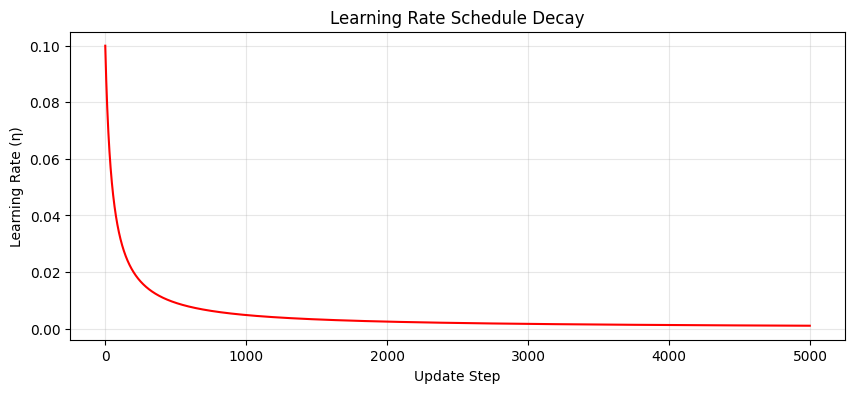

In [ ]:
# Plot how the learning rate changes over time
learning_rates = []
steps = range(len(theta_path_sgd))

for t in steps:
    learning_rates.append(learning_schedule(t))

plt.figure(figsize=(10, 4))
plt.plot(steps, learning_rates, "r-")
plt.xlabel("Update Step")
plt.ylabel("Learning Rate (η)")
plt.title("Learning Rate Schedule Decay")
plt.grid(True, alpha=0.3)
plt.show()

### Compare with Batch Gradient Descent


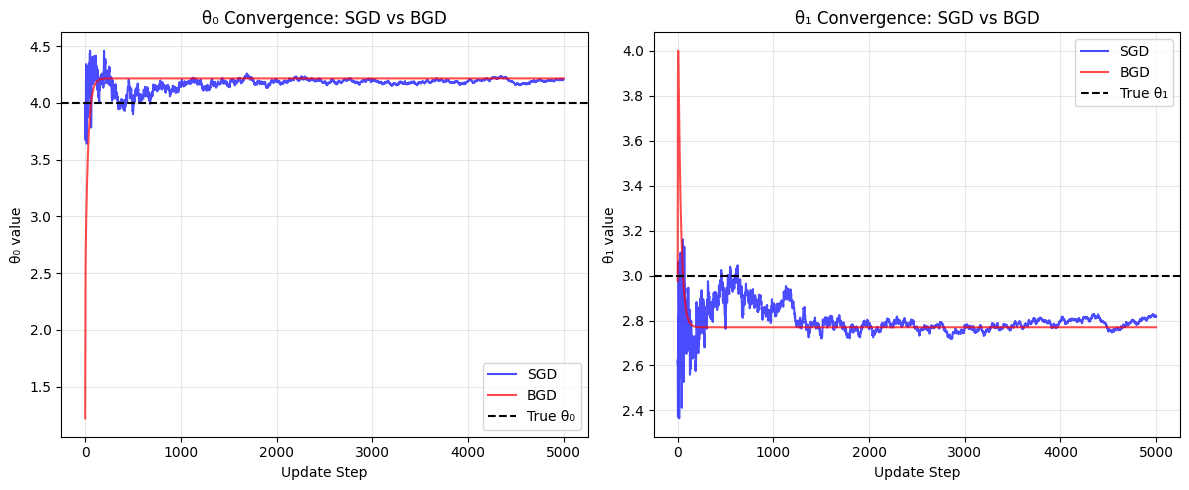

In [13]:
# Let's also run BGD for comparison
theta_bgd = np.random.randn(2, 1)
theta_path_bgd = []

for iteration in range(n_epochs * m):  # Same number of updates
    gradients = 2 / m * X_b.T.dot(X_b.dot(theta_bgd) - y)
    theta_bgd = theta_bgd - 0.1 * gradients  # Constant learning rate
    theta_path_bgd.append(theta_bgd.copy())

theta_path_bgd_array = np.array(theta_path_bgd).squeeze()

# Compare convergence
plt.figure(figsize=(12, 5))

plt.subplot(121)
plt.plot(theta_path_sgd_array[:, 0], "b-", alpha=0.7, label="SGD")
plt.plot(theta_path_bgd_array[:, 0], "r-", alpha=0.7, label="BGD")
plt.axhline(y=4, color="k", linestyle="--", label="True θ₀")
plt.xlabel("Update Step")
plt.ylabel("θ₀ value")
plt.title("θ₀ Convergence: SGD vs BGD")
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(122)
plt.plot(theta_path_sgd_array[:, 1], "b-", alpha=0.7, label="SGD")
plt.plot(theta_path_bgd_array[:, 1], "r-", alpha=0.7, label="BGD")
plt.axhline(y=3, color="k", linestyle="--", label="True θ₁")
plt.xlabel("Update Step")
plt.ylabel("θ₁ value")
plt.title("θ₁ Convergence: SGD vs BGD")
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()